<a href="https://colab.research.google.com/github/Mahiyan-Khan-Abir/Heart-Failure-Prediction-with-ANN/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Heart/heart_failure_clinical_records_dataset.csv")
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [18]:
df.iloc[:, [1,3,5,9,10,12]]

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


In [24]:
df_cls = pd.DataFrame({'anaemia': df['anaemia'],'diabetes': df['diabetes'],'high_blood_pressure': df['high_blood_pressure'],'sex': df['sex'],'smoking': df['smoking'],'DEATH_EVENT': df['DEATH_EVENT']},)
df_cls

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


**Finding whather there is any missing value in the tuples**

In [25]:
#Finding missing data
df_cls = pd.DataFrame(df_cls)
df_cls.isnull()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
294,False,False,False,False,False,False
295,False,False,False,False,False,False
296,False,False,False,False,False,False
297,False,False,False,False,False,False


**Finding correlation among dependent and independent variables**

In [26]:
#Correlation
import matplotlib.pyplot as plt
corr = df_cls.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
anaemia,1.000000,-0.012729,0.038182,-0.094769,-0.107290,0.066270
diabetes,-0.012729,1.000000,-0.012732,-0.157730,-0.147173,-0.001943
high_blood_pressure,0.038182,-0.012732,1.000000,-0.104615,-0.055711,0.079351
sex,-0.094769,-0.157730,-0.104615,1.000000,0.445892,-0.004316
smoking,-0.107290,-0.147173,-0.055711,0.445892,1.000000,-0.012623
DEATH_EVENT,0.066270,-0.001943,0.079351,-0.004316,-0.012623,1.000000


**Assigning the dependent and independent variables**

In [45]:
x= df_cls.iloc[:, [0,1,2,4]].values  
y= df_cls.iloc[:, 5].values  
#print(x)


**Splitting the dataset into training and test set**

In [46]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

**feature Scaling**

In [47]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

1D CNN


In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, Flatten
from keras.regularizers import l2

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dense(units=4, activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs= 100, batch_size=16, verbose=1, validation_data=(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test))


Epoch 1/100
14/14 [==============================] - 2s 34ms/step - loss: 1.4315 - accuracy: 0.6920 - val_loss: 1.3838 - val_accuracy: 0.6400
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 1.3170 - accuracy: 0.6920 - val_loss: 1.2847 - val_accuracy: 0.6400
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 1.2153 - accuracy: 0.6920 - val_loss: 1.1991 - val_accuracy: 0.6400
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 1.1294 - accuracy: 0.6920 - val_loss: 1.1268 - val_accuracy: 0.6400
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 1.0537 - accuracy: 0.6920 - val_loss: 1.0644 - val_accuracy: 0.6400
Epoch 6/100
14/14 [==============================] - 0s 8ms/step - loss: 0.9923 - accuracy: 0.6920 - val_loss: 1.0113 - val_accuracy: 0.6400
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9386 - accuracy: 0.6920 - val_loss: 0.9646 - val_accuracy: 0.6400
Epoch 8/100


In [55]:
train_results_CNN = model.evaluate(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, verbose=0)
test_results_CNN = model.evaluate(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test, verbose=0)

# extract the loss and accuracy values
train_loss_CNN = train_results_CNN[0]
train_acc_CNN = train_results_CNN[1]
test_loss_CNN = test_results_CNN[0]
test_acc_CNN = test_results_CNN[1]

print("Train accuracy:", train_acc_CNN)
print("Test accuracy:", test_acc_CNN)

Train accuracy: 0.6919642686843872
Test accuracy: 0.6399999856948853


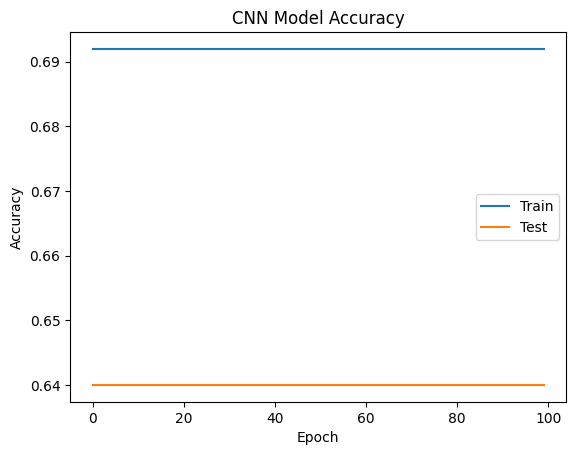

In [56]:
train_acc_CNN = history.history['accuracy']
test_acc_CNN = history.history['val_accuracy']
# plot the train and test accuracy
plt.plot(train_acc_CNN, label='Train')
plt.plot(test_acc_CNN, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')
plt.legend()
plt.show()

RNN

In [57]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# define the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(x_train.shape[1], 1)))
model_rnn.add(Dense(1, activation='sigmoid'))

# compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history_rnn = model_rnn.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs= 100, batch_size=32, validation_data=(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test))




Epoch 1/100
7/7 [==============================] - 4s 146ms/step - loss: 0.6914 - accuracy: 0.5268 - val_loss: 0.6885 - val_accuracy: 0.5467
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 0.6794 - accuracy: 0.6562 - val_loss: 0.6797 - val_accuracy: 0.6400
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6666 - accuracy: 0.6920 - val_loss: 0.6716 - val_accuracy: 0.6400
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6530 - accuracy: 0.6920 - val_loss: 0.6639 - val_accuracy: 0.6400
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6393 - accuracy: 0.6920 - val_loss: 0.6578 - val_accuracy: 0.6400
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6258 - accuracy: 0.6920 - val_loss: 0.6575 - val_accuracy: 0.6400
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6145 - accuracy: 0.6920 - val_loss: 0.6634 - val_accuracy: 0.6400
Epoch 8/100
7/7 [==

In [58]:
# evaluate the model
train_acc_rnn = model_rnn.evaluate(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, verbose=0)[1]
test_acc_rnn = model_rnn.evaluate(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test, verbose=0)[1]
print("Train accuracy on SPI 03:", train_acc_rnn)
print("Test accuracy on SPI 03:", test_acc_rnn)

Train accuracy on SPI 03: 0.6919642686843872
Test accuracy on SPI 03: 0.6399999856948853


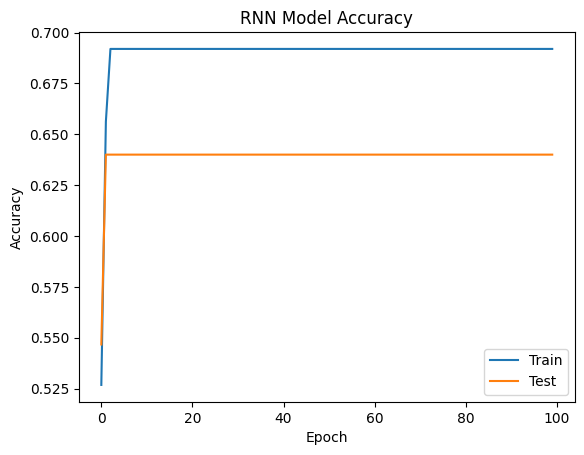

In [59]:
train_acc_rnn = history_rnn.history['accuracy']
test_acc_rnn = history_rnn.history['val_accuracy']
# plot the train and test accuracy
plt.plot(train_acc_rnn, label='Train')
plt.plot(test_acc_rnn, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Model Accuracy')
plt.legend()
plt.show()

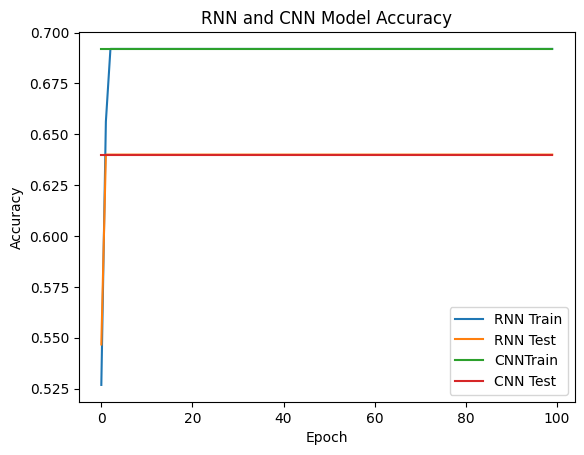

In [60]:
train_acc_rnn = history_rnn.history['accuracy']
test_acc_rnn = history_rnn.history['val_accuracy']

train_acc_CNN = history.history['accuracy']
test_acc_CNN = history.history['val_accuracy']

# plot the train and test accuracy
plt.plot(train_acc_rnn, label='RNN Train')
plt.plot(test_acc_rnn, label='RNN Test')
plt.plot(train_acc_CNN, label='CNNTrain')
plt.plot(test_acc_CNN, label='CNN Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN and CNN Model Accuracy')
plt.legend()
plt.show()


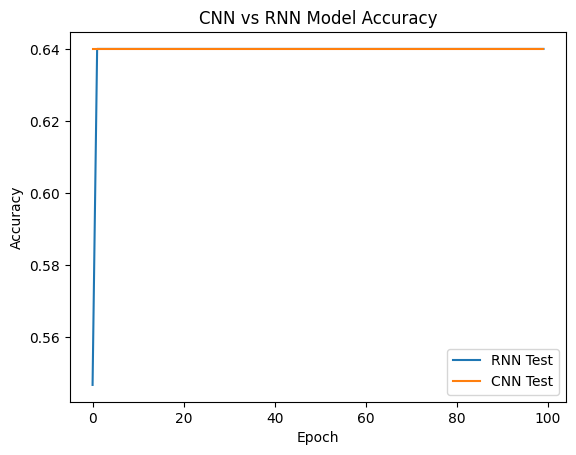

In [61]:
test_acc_rnn = history_rnn.history['val_accuracy']
test_acc_CNN = history.history['val_accuracy']

# plot the train and test accuracy
plt.plot(test_acc_rnn, label='RNN Test')
plt.plot(test_acc_CNN, label='CNN Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN vs RNN Model Accuracy')
plt.legend()